<a href="https://colab.research.google.com/github/LimDoHyeon/BXAI-MNEstudy/blob/main/%5BMNE_Introductory_tutorials%5D_Overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNE-Python software is an open-source Python package for exploring, visualizing, and **analyzing human neurophysiological data** such as MEG, EEG, sEEG, ECoG, and more. It includes modules for data input/output, preprocessing, visualization, source estimation, time-frequency analysis, connectivity analysis, machine learning, and statistics.

In [ ]:
#importing the necessary Python modules
!pip install mne
import numpy as np
import mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Loading Data
> MNE-Python data structures are based around the FIF file format from Neuromag, but there are reader functions for a wide variety of other data formats. MNE-Python also has interfaces to a variety of publicly available datasets, which MNE-Python can download and manage for you.

We'll start by **sample datasets** containing EEG and MEG, along with structural MRI scans for that subject.

`mne.datasets.sample.data_path` function will automatically download the dataset.

In [ ]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = (sample_data_folder / 'MEG' / 'sample' / 'sample_audvis_filt-0-40_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file)

Opening raw data file /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.


In [ ]:
print(raw)
print(raw.info)

<Raw | sample_audvis_filt-0-40_raw.fif, 376 x 41700 (277.7 s), ~3.3 MB, data not loaded>
<Info | 15 non-empty values
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off, Average EEG reference: off
 sfreq: 150.2 Hz
>


- Raw objects also have several built-in plotting methods; here we show the power spectral density (PSD) for each sensor type with plot_psd, as well as a plot of the raw sensor traces with plot.
- interactive Python sessions, plot is interactive and allows scrolling, scaling, bad channel marking, annotations, projector toggling, etc.

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 13.639 (s)


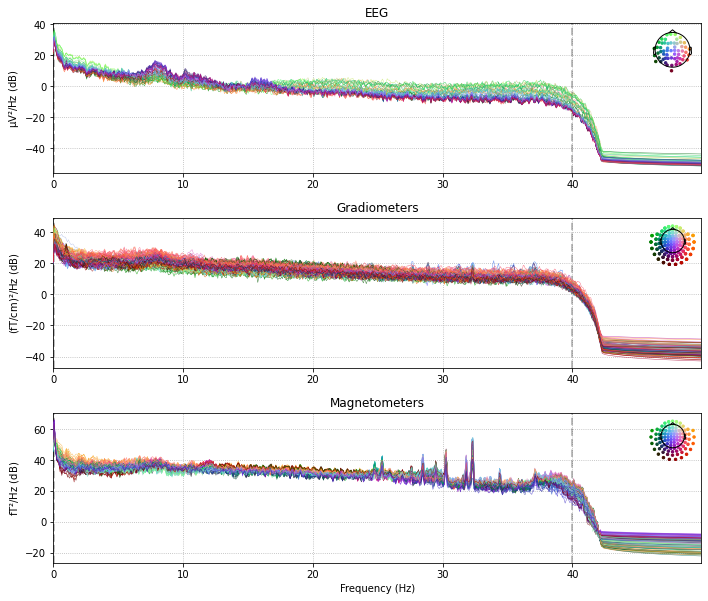

/usr/local/lib/python3.8/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


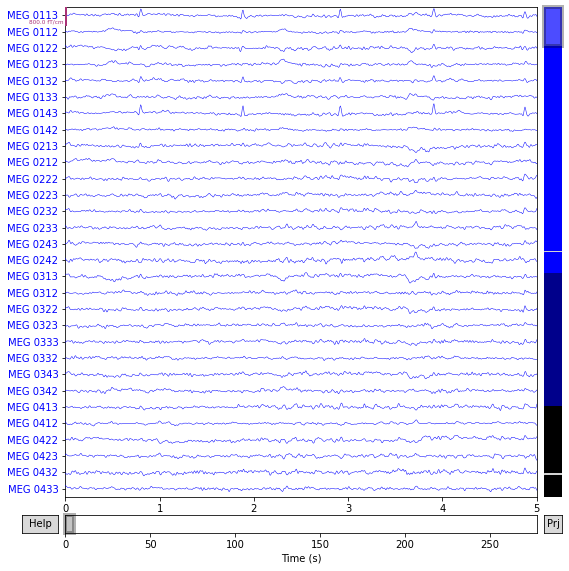

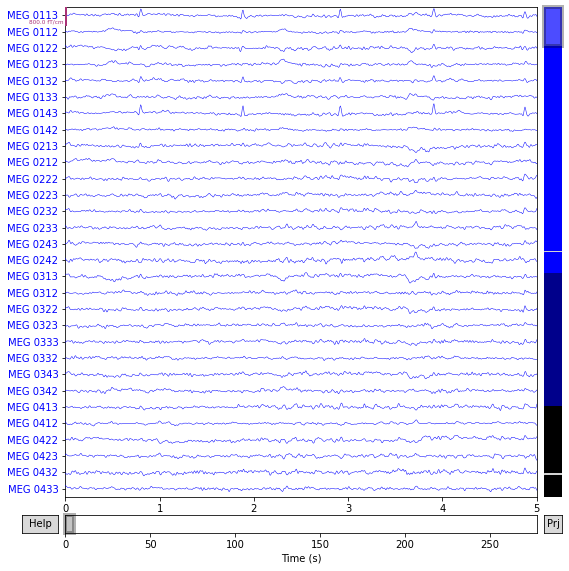

In [ ]:
raw.plot_psd(fmax=50) #psd = power spectral density
raw.plot(duration=5, n_channels=30)

#Preprocessing
MNE-Pythons은 maxwell filtering, signal-space projection, independent components analysis, filtering, downsampling 등 다양한 전처리 기술 및 접근을 지원합니다.
- ICA(Independent Component Analysis)를 이용하여 데이터를 정리

Fitting ICA to data using 364 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 8.0s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated


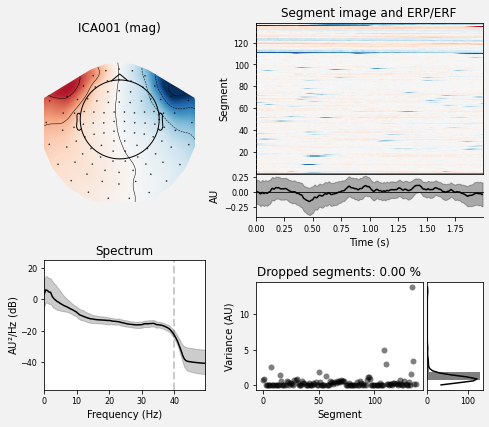

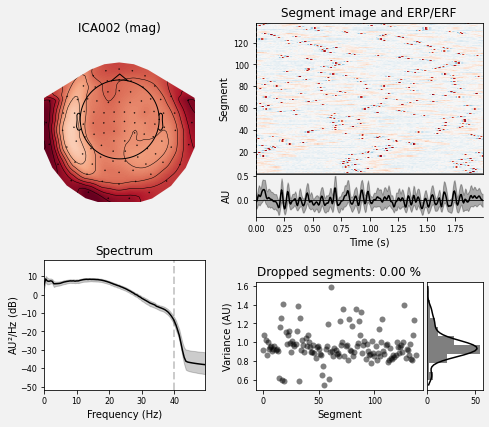

[<Figure size 504x432 with 6 Axes>, <Figure size 504x432 with 6 Axes>]

In [ ]:
#set up and fit the ICA
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw)
ica.exclude = [1,2] #details on how we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude)

- 제거할 구성 요소에 대해 확신이 들면 `exclude` 파라미터로 전달한 다음, ICA를 raw signal에 적용합니다.
- `apply` 메서드는 raw 데이터가 메모리로 로드되는 것을 요구하기 때문에 `load_data`를 먼저 사용
- raw의 카피 객체 버전을 먼저 만들어서 전후 신호를 비교할 수 있도록 할 것

Reading 0 ... 41699  =      0.000 ...   277.709 secs...
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 2 ICA components
    Projecting back using 364 PCA components


/usr/local/lib/python3.8/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


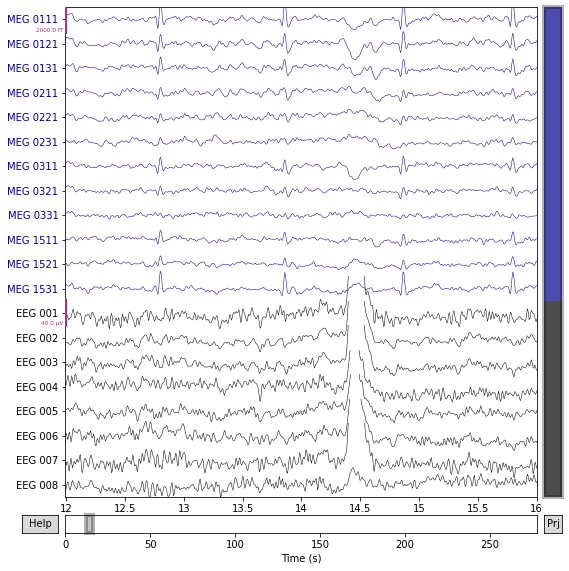

/usr/local/lib/python3.8/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


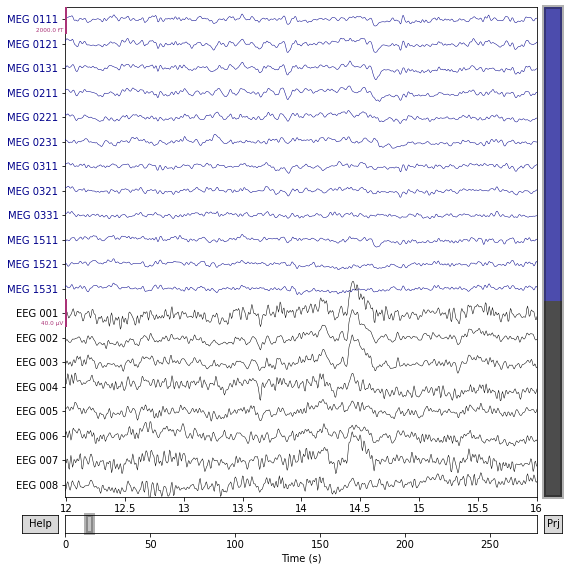

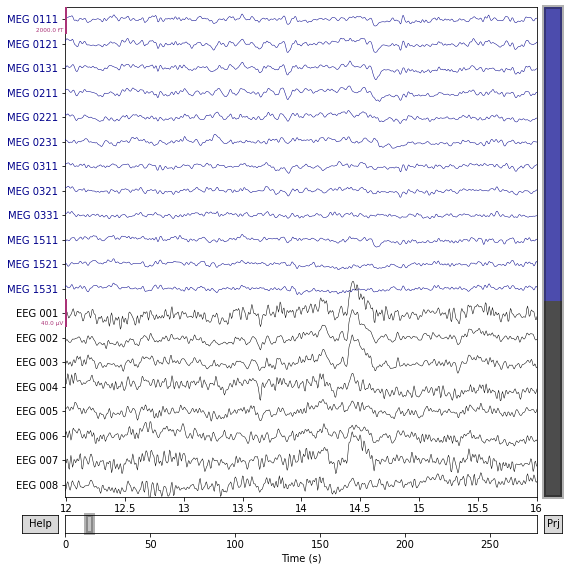

In [ ]:
orig_raw = raw.copy()
raw.load_data() #load_data() : Load raw data / verbose = none
ica.apply(raw)

#show some frontal channels to clearly illustrate the artifact removal
chs = ['MEG 0111', 'MEG 0121', 'MEG 0131', 'MEG 0211', 'MEG 0221', 'MEG 0231',
       'MEG 0311', 'MEG 0321', 'MEG 0331', 'MEG 1511', 'MEG 1521', 'MEG 1531',
       'EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006', 'EEG 007', 'EEG 008']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
orig_raw.plot(order=chan_idxs, start=12, duration=4)
raw.plot(order=chan_idxs, start=12, duration=4)

#Detecting experimental events
- 샘플 데이터셋에는 신호 전달 컴퓨터에서 전송된 전기 신호(짧은 DC 이동/구형파 펄스)를 기록하는 여러 "STIM"채널이 포함되어 있음
- 트리거라고 불리는 이 펄스들은 experimental events를 기록하기 위해 사용됨 - stimulus onset, stimulus type, participant response(button press)
- 개별 STIM 채널은 해당 채널의 전압 레벨을 특정 이벤트 유형으로 명확하게 디코딩할 수 있는 방식으로 단일 채널에 결합

In [ ]:
events = mne.find_events(raw, stim_channel='STI 014')
print(events[:5])

319 events found
Event IDs: [ 1  2  3  4  5 32]
[[6994    0    2]
 [7086    0    3]
 [7192    0    1]
 [7304    0    4]
 [7413    0    2]]


- 결과 이벤트 배열은 첫 번째 열에 샘플 번호가 있고 마지막 열에 정수 이벤트 ID가 있는 일반 3열 (중간 열은 일반적으로 무시)
- 정수 이벤트 ID를 추적하는 대신 정수 ID를 실험 조건이나 이벤트에 매핑 하는 event dictionary를 제공할 수 있음
- 이 데이터 세트에서 매핑은 다음과 같음
  - 1 : 왼쪽 귀에 대한 청각 자극(톤)
  - 2 : 오른쪽 귀에 대한 청각 자극(톤)
  - 3 : 왼쪽 시야에 시각적 자극(바둑판)
  - 4 : 오른쪽 시야에 시각적 자극(바둑판)
  - 5 : 웃는 얼굴 (catch trial)
  - ...
  - 32 : 버튼 누르기 (버튼 : 실험에 영향 주는 요소)

In [ ]:
event_dict = {'auditory/left': 1, 'auditory/right': 2, 'visual/left': 3, 'visual/right': 4,
              'smiley': 5, 'buttonpress': 32}

- 이와 같은 event dictionary는 연속적 데이터에서 에포크를 추출할 때 사용됨
- '/'는 부분 조건 설명자를 요청해 풀링을 허용함
  - 'auditory'는 ID 1번, 2번과 모든 에포크를 선택할 것
  - 'left'는 ID 1번, 3번과 모든 에포크를 선택할 것
- `plot_events` : recording 동안의 이벤트의 분포를 시각화하는 기능 (이벤트 감지가 예상대로 작동하는지 확인하기 위한 목적)
- `Info` 기능으로 샘플 주파수 사용

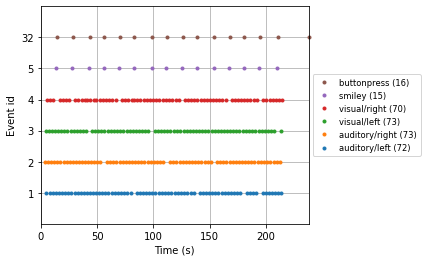

In [ ]:
fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=raw.info['sfreq'],
                          first_samp=raw.first_samp)

#Epoching continuous data
- 데이터 퀄리티 규제를 지정하는 것
- 피크-피크 신호 진폭이 해당 채널에 대한 합리적 제한을 초과하는 에포크는 모두 거부
  - 이후 rejection dictionary로 이동

In [ ]:
reject_criteria = dict(mag=3000e-15,   # 4000 fT
                       grad=4000e-13,  # 4000 fT/cm
                       eeg=150e-6,     # 150 µV
                       eog=250e-6)     # 250 µV

- event dictionary를 event_id 매개변수로 전달(정수 이벤트 ID 대신 풀링하기 쉬운 이벤트 레이블로 작업할 수 있도록)
- `tmin`및 `tmax`(각 에포크를 시작하고 종료할 각 이벤트에 상대적인 시간)을 지정
- 위에서 언급했듯이 default Raw 및 Epochs 데이터는 메모리에 로드되지 않지만(필요할 때만 디스크에서 액세스됨)
  - `preload=True` 파라미터를 사용해 rejection criteria가 적용된 결과를 볼 수 있도록 메모리를 사용해 강제로 로드함

In [ ]:
epochs = mne.Epochs(raw, events, event_id = event_dict, tmin= -0.2, tmax = 0.5,
                    reject = reject_criteria, preload = True)

Not setting metadata
319 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 4)
4 projection items activated
Using data from preloaded Raw for 319 events and 106 original time points ...
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EEG : ['EEG 008']
    Rejecting  epoch based on MAG : ['MEG 1331']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
11 bad epochs dropped


- 청각/시각 반응을 비교하기 위해 왼쪽/오른쪽 자극(출력)을 풀링
- 신호가 왼쪽/오른쪽으로 치우치지 않도록 `equalize_event_counts`를 사용해 현재 가장 안 좋은 에포크와 랜덤 샘플 에포크를 매치시킴

In [ ]:
conds_we_care_about = ['auditory/left', 'auditory/right', 'visual/left', 'visual/right']
epochs.equalize_event_counts(conds_we_care_about) #this operates in-place
aud_epochs = epochs['auditory']
vis_epochs = epochs['visual']
del raw, epochs # free up memory

Dropped 6 epochs: 121, 195, 270, 272, 273, 274


- Raw 오브젝트처럼 Epochs 오브젝트도 기본 제공 플로팅 방법이 존재
- `plot_image`는 각 에포크를 하나의 이미지 맵의 열로 보여준다.
  - 신호 세기를 색으로 표현함
  - 평균적으로 나타난 반응과 센서 위치는 아래 결과 이미지(output)에 나타나져 있다.

Not setting metadata
136 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
136 matching events found
No baseline correction applied
0 projection items activated


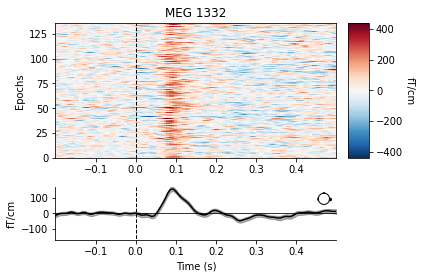

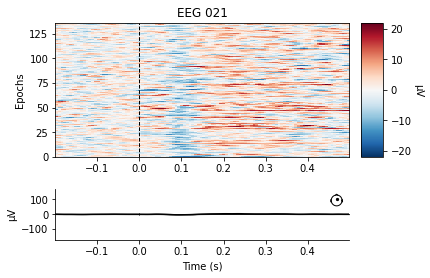

[<Figure size 432x288 with 4 Axes>, <Figure size 432x288 with 4 Axes>]

In [ ]:
aud_epochs.plot_image(picks=['MEG 1332', 'EEG 021'])

# Time-frequency analysis
- `mne.time_frequency` : 시간-주파수 표현, 전력 스펙트럼 밀도 & 교차 스펙트럼 밀도 등을 계산하는 알고리즘의 구현을 제공
  - ex: Morlet 웨이블릿을 사용하여 다양한 주파수와 시간에서 유도 전력을 청각 에포크에 대해 계산
    - 참고. 웨이블릿(wavelet) : 0을 중심으로 증가와 감소를 반복하는 진폭을 수반한, 파동같은 진동

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>
Removing projector <Projection | Average EEG reference, active : True, n_channels : 60>
Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>
Removing projector <Projection | Average EEG reference, active : True, n_channels : 60>
No baseline correction applied


[Parallel(n_jobs=1)]: Done 364 out of 364 | elapsed:   11.7s finished


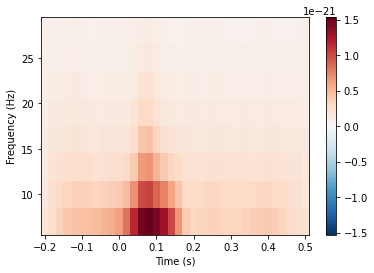

[<Figure size 432x288 with 2 Axes>]

In [ ]:
frequencies = np.arange(7, 30, 3)
power = mne.time_frequency.tfr_morlet(aud_epochs, n_cycles = 2, return_itc = False, freqs = frequencies, decim = 3)
power.plot(['MEG 1332'])

# Estimating evoked responses
- 이제 우리의 conditions은 `aud_epochs`와 `vis_epochs`에 있으므로, 각 조건에서 epoch를 함께 평균화해 청각과 시각 자극에서 유발된 반응 추정치를 얻을 수 있음
- 이것은 `Epochs` 객체에서 `average`메서드를 호출하고, Evoked된 각 센서의 전역 세기를 비교하기 위한 `mne.viz` 모듈로부터 함수를 사용하면 되어 간편하다.

Multiple channel types selected, returning one figure per type.
combining channels using "gfp"
combining channels using "gfp"


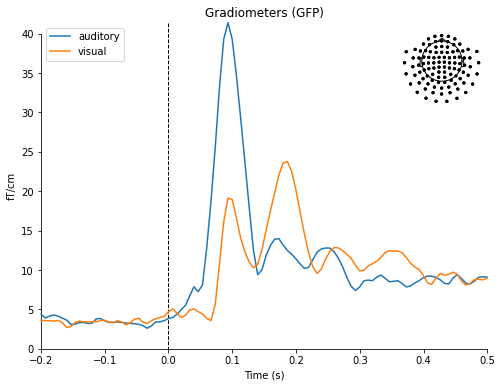

combining channels using "gfp"
combining channels using "gfp"


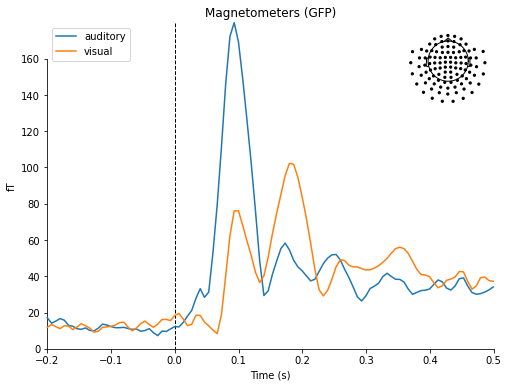

combining channels using "gfp"
combining channels using "gfp"


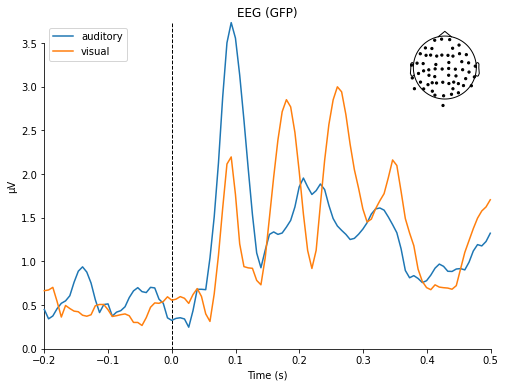

[<Figure size 576x432 with 2 Axes>,
 <Figure size 576x432 with 2 Axes>,
 <Figure size 576x432 with 2 Axes>]

In [ ]:
aud_evoked = aud_epochs.average()
vis_evoked = vis_epochs.average()

mne.viz.plot_compare_evokeds(dict(auditory=aud_evoked, visual=vis_evoked), legend='upper left', show_sensors='upper right')

- `plot_joint`, `plot_topomap`과 같은 plotting(시각화) 방법을 사용해 각 'Evoked object'에 대한 자세한 관찰도 가능함
- 이번 절에서 EEG 채널을 조사하고, dorso-frontal(등전두엽) 전극의 N100-P200 패턴을 통해 유발된 원본 청각을 관찰함
  - 이후 scalp(머리 가죽)의 지형을 임의의 추가 시간에 시각화함

Projections have already been applied. Setting proj attribute to True.
Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


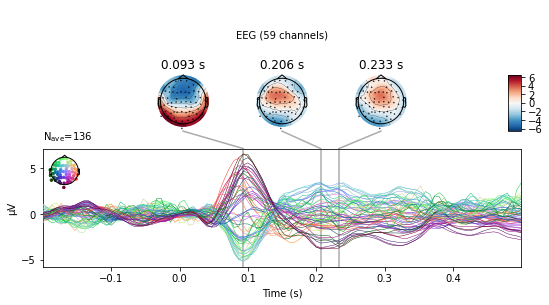

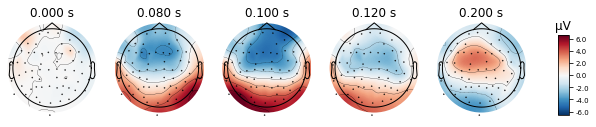

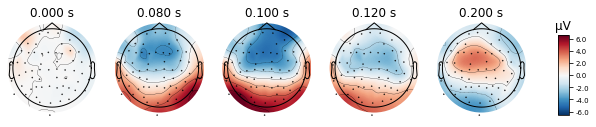

In [ ]:
aud_evoked.plot_joint(picks='eeg')
aud_evoked.plot_topomap(times=[0., 0.08, 0.1, 0.12, 0.2], ch_type='eeg')

- 출력(evoked)된 객체들은 (`mne.combine_evoked` 함수를 사용하여) conditions 간의 대조를 표시하기 위해 결합될 수 있음
- `weights=[1,-1]`를 사용하는 과정에서 약간의 차이가 발생할 수 있다.
- `plot_topo`를 사용해 각 센서의 파동의 차이를 시각화할 수 있음

Removing projector <Projection | Average EEG reference, active : True, n_channels : 60>


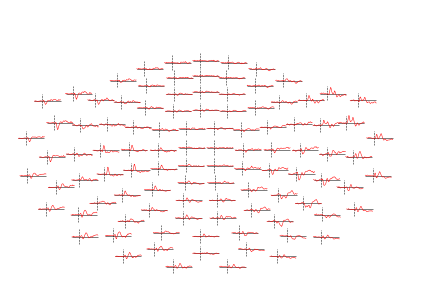

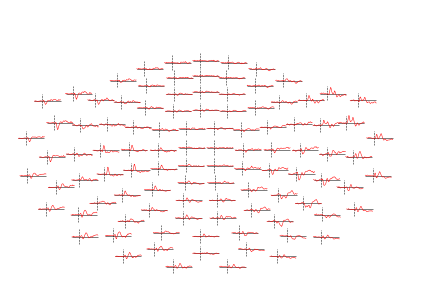

In [ ]:
evoked_diff = mne.combine_evoked([aud_evoked, vis_evoked], weights=[1, -1])
evoked_diff.pick_types(meg='mag').plot_topo(color='r', legend=False)

# Inverse modeling
- 센서 데이터를 투영해 유발된 활동(외부 자극)의 원본을 추정하는 프로세스
- MNE에서는 linear inverse operator을 통해 EEG와 MEG 센서 측정 값을 투영함
- 이번 샘플은 규제를 이용해 꽤 선명한 역모델링이 진행될 것


In [ ]:
# Load inverse operator
inverse_operator_file = (sample_data_folder / 'MEG' / 'sample' / 'sample_audvis-meg-oct-6-meg-inv.fif')
inv_operator = mne.minimum_norm.read_inverse_operator(inverse_operator_file)

# set signal-to-noise ratio(SNR) to compute regularization parameter (λ²)
snr = 3.
lambda2 = 1. / snr ** 2

# generate the source time course (STC)
stc = mne.minimum_norm.apply_inverse(vis_evoked, inv_operator, lambda2 = lambda2, method='MNE') # or dSPM, sLORETA, eLORETA

Reading inverse operator decomposition from /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis-meg-oct-6-meg-inv.fif...
    Reading inverse operator info...
    [done]
    Reading inverse operator decomposition...
    [done]
    305 x 305 full covariance (kind = 1) found.
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Noise covariance matrix read.
    22494 x 22494 diagonal covariance (kind = 2) found.
    Source covariance matrix read.
    22494 x 22494 diagonal covariance (kind = 6) found.
    Orientation priors read.
    22494 x 22494 diagonal covariance (kind = 5) found.
    Depth priors read.
    Did not find the desired covariance matrix (kind = 3)
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing patch sta

- 마지막으로 피험자의 피질 표면 소스(원본) 추정치를 시각화하려면 샘플 피험자의 구조적 MRI 파일에 대한 경로도 필요함
- `subjects_dir` 사용

In [ ]:
!pip install pyqt5

# path to subjects' MRI files
subjects_dir = sample_data_folder / 'subjects'

#plot the STC
stc.plot(initial_time = 0.1, hemi = 'split', views=['lat', 'med'], subjects_dir = subjects_dir)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Using control points [8.59557372e-11 1.06740765e-10 4.48630701e-10]


RuntimeError: ignored